In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [2]:
df=pd.read_csv('train.csv')
df = shuffle(df)
df = df.reset_index(drop=True)
df.isnull().sum()    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [3]:
df = shuffle(df)
df = df.reset_index(drop=True)
df.isnull().sum()    
df.dropna(inplace=True) #drop rows have at least 1 NaN value ,  inplace=True make permanent
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [4]:
conversion_dict = { 0:'Real', 1:'Fake'}
df['label'] = df['label'].replace(conversion_dict)
df.label.value_counts()

Real    10361
Fake     7924
Name: label, dtype: int64

In [5]:
df.drop(["title"],axis=1,inplace=True)
df.drop(["id"],axis=1,inplace=True)
df.drop(["author"],axis=1,inplace=True)

#df['text'] = df['text'].str.replace(r'\W',"")

df['text']=df['text'].apply(str)

df['text'] = df['text'].apply(lambda x: x.lower())

df = shuffle(df)
df = df.reset_index(drop=True)

df

,text,label
0,the strict french gun control that makes it ex...,Real
1,house speaker paul ryan urged republican inves...,Real
2,there have been two recent congressional inves...,Real
3,share this residents were fed up with hearing ...,Fake
4,garrison keillor’s “a prairie home companion” ...,Real
...,...,...
18280,google and facebook will be working with the m...,Real
18281,washington — when donald j. trump descended...,Real
18282,a fourth grade teacher from michigan will not ...,Real
18283,"oakland, calif. — since she was 14, tiffany...",Real


<AxesSubplot:>

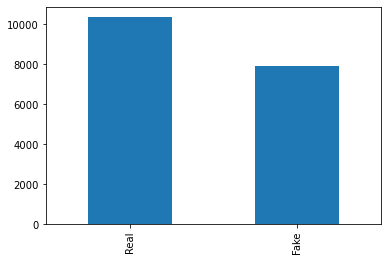

In [6]:
df['label'].value_counts().plot(kind = 'bar')

In [7]:
df

,text,label
0,the strict french gun control that makes it ex...,Real
1,house speaker paul ryan urged republican inves...,Real
2,there have been two recent congressional inves...,Real
3,share this residents were fed up with hearing ...,Fake
4,garrison keillor’s “a prairie home companion” ...,Real
...,...,...
18280,google and facebook will be working with the m...,Real
18281,washington — when donald j. trump descended...,Real
18282,a fourth grade teacher from michigan will not ...,Real
18283,"oakland, calif. — since she was 14, tiffany...",Real


In [8]:
import string 
#df["text"] = df['text'].str.replace('[^\w\s]','')
df['text'].str.replace('[{}]'.format(string.punctuation), '')
df['text'][0]

'the strict french gun control that makes it extremely difficult for   citizens to defend themselves has proven little more than a paper tiger when it comes to prohibiting terrorists and public attackers from acquiring the guns they need to kill innocents. [the april 20 attack on a police patrol on the champs élysées illustrates this perfectly in light of the fact that the alleged attacker —  karim cheurfi —  was previously jailed for shooting at officers with a . 38 special revolver. the daily mail reports that cheurfi was imprisoned “in 2005 for trying to kill two policemen” and wounding a third person with the revolver.  on thursday he allegedly used a kalashnikov to kill two officers. he was then shot dead, and upon searching his car, police discovered more weapons, “including a pump action shotgun. ” the university of sydney’s gunpolicy. org describes french gun laws as “restrictive,” yet they were powerless to stop cheurfi, just as they offered no hindrance to the    who entered 

In [23]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], df['label'], test_size=0.3, random_state=7, shuffle=True)
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7) #delete uninformative stop words him and etc...

In [24]:
y_train[0]

'Real'

In [25]:
x_train[0]

'the strict french gun control that makes it extremely difficult for   citizens to defend themselves has proven little more than a paper tiger when it comes to prohibiting terrorists and public attackers from acquiring the guns they need to kill innocents. [the april 20 attack on a police patrol on the champs élysées illustrates this perfectly in light of the fact that the alleged attacker —  karim cheurfi —  was previously jailed for shooting at officers with a . 38 special revolver. the daily mail reports that cheurfi was imprisoned “in 2005 for trying to kill two policemen” and wounding a third person with the revolver.  on thursday he allegedly used a kalashnikov to kill two officers. he was then shot dead, and upon searching his car, police discovered more weapons, “including a pump action shotgun. ” the university of sydney’s gunpolicy. org describes french gun laws as “restrictive,” yet they were powerless to stop cheurfi, just as they offered no hindrance to the    who entered 

In [26]:
vec_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U')) #fit to data than transform it 
vec_test=tfidf_vectorizer.transform(x_test.values.astype('U')) #Uses the vocabulary and document frequencies (df) 
# which learned by fit_transform

In [27]:
pac=PassiveAggressiveClassifier(max_iter=50) #maximum number of passes over the training epochs, responds happenning in  
# every 50 iterations. Default is 1000 but for large datas
#gets stimulates by wrong epochs and have responds to actions
pac.fit(vec_train,y_train) # fit label to vector train to teach ML how to respond

PassiveAggressiveClassifier(max_iter=50)

In [28]:
y_pred=pac.predict(vec_test) #giving 0.8 of data to empty matrix 
score=accuracy_score(y_test,y_pred) # y_pred's labels will be passed to y_test empty matrix , than it will be compared with 
#y_train which actual label 

In [29]:
print('Accuracy score ')
print(round(score*100,3))

Accuracy score 
96.026


In [16]:
confusion_matrix(y_test,y_pred, labels=['Real','Fake']) #1608 true tested text which 63 times ML was wrong 
#1205 fake news tested but 76 times ML was wrong

array([[1977,   58],
       [  81, 1541]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

        Fake       0.96      0.95      0.96      1622
        Real       0.96      0.97      0.97      2035

    accuracy                           0.96      3657
   macro avg       0.96      0.96      0.96      3657
weighted avg       0.96      0.96      0.96      3657



In [18]:
''' all of them between 0-1
tp / (tp + fp) precision -> tp is the number of true positives and fp the number of false positives
tp / (tp + fn) recall -> fn the number of false negatives

weighted harmonic mean of the precision and recall->f1-score

The number of occurrences of each label in y_true ->support
'''

' all of them between 0-1\ntp / (tp + fp) precision -> tp is the number of true positives and fp the number of false positives\ntp / (tp + fn) recall -> fn the number of false negatives\n\nweighted harmonic mean of the precision and recall->f1-score\n\nThe number of occurrences of each label in y_true ->support\n'

Confusion matrix, without normalization


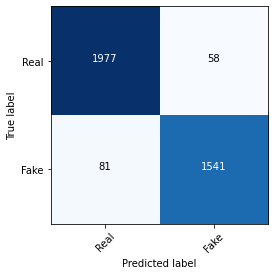

In [19]:
# https://stackoverflow.com/questions/48817300/sklearn-plot-confusion-matrix-combined-across-trainingtest-sets
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = metrics.confusion_matrix(y_test,y_pred, labels=['Real','Fake'])
plot_confusion_matrix(cm, classes=['Real', 'Fake'])   

In [20]:
df_test = pd.read_csv('test.csv')
df_test = shuffle(df_test)
df_test = df_test.reset_index(drop=True)
df_test.dropna(inplace=True)
df_test.isnull().sum()    
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4575 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4575 non-null   int64 
 1   title   4575 non-null   object
 2   author  4575 non-null   object
 3   text    4575 non-null   object
dtypes: int64(1), object(3)
memory usage: 178.7+ KB


In [21]:
'''def testter(newtext):
    #vector = tfidf_vectorizer.transform(newtext.values.astype('U'))
    vec_newtest = tfidf_vectorizer.transform(newtext)
    y_pred = pac.predict(vec_newtest)
    return y_pred[0]'''

"def testter(newtext):\n    #vector = tfidf_vectorizer.transform(newtext.values.astype('U'))\n    vec_newtest = tfidf_vectorizer.transform(newtext)\n    y_pred = pac.predict(vec_newtest)\n    return y_pred[0]"

In [22]:
'''df_test['text'][0]=df_test['text'][0].apply(str)
df_test['text'][0] = tfidf_vectorizer.fit_transform(df_test['text'][0].values.astype('U'))
testter(df_test['text'][0])'''

"df_test['text'][0]=df_test['text'][0].apply(str)\ndf_test['text'][0] = tfidf_vectorizer.fit_transform(df_test['text'][0].values.astype('U'))\ntestter(df_test['text'][0])"